# RNNの学習に使うシミュレーションデータを簡単に作る


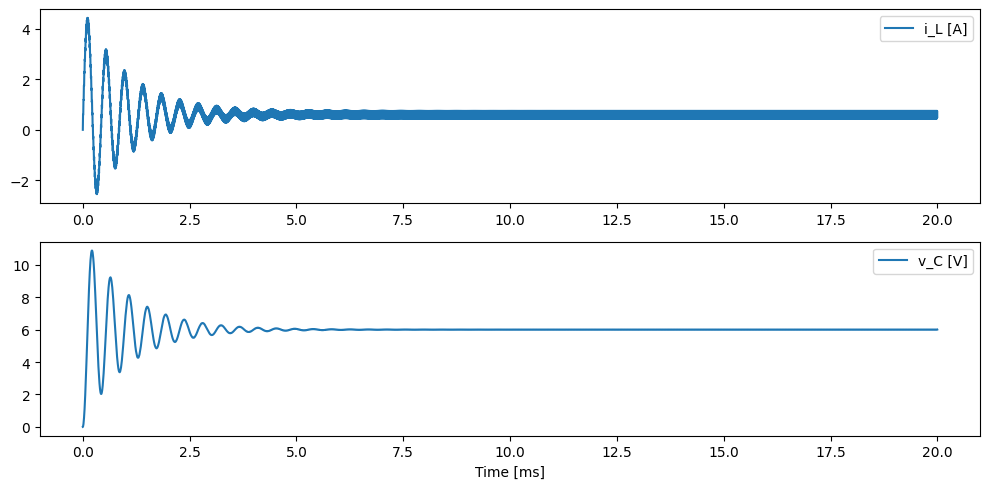

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------
# パラメータ設定
# -----------------------------------------
Vin = 12.0  # 入力電圧 [V]
L = 100e-6  # インダクタ [H]
C = 47e-6  # コンデンサ [F]
R = 10.0  # 負荷抵抗 [Ω]
dt = 1e-6  # タイムステップ [s]
Tsim = 0.02  # シミュレーション時間 [s]
steps = int(Tsim / dt)

# -----------------------------------------
# PWM（スイッチング波形）設定
# -----------------------------------------
f_sw = 100e3  # スイッチング周波数 [Hz]
duty = 0.5  # デューティ比
period = int(1 / f_sw / dt)

# スイッチング波形生成（単純矩形波）
va = np.zeros(steps)
for t in range(steps):
    if (t % period) < (period * duty):
        va[t] = Vin
    else:
        va[t] = 0.0

# -----------------------------------------
# 状態変数初期化
# -----------------------------------------
iL = np.zeros(steps)
vC = np.zeros(steps)
iL[0] = 0.0
vC[0] = 0.0

# -----------------------------------------
# オイラー法によるシミュレーション
# -----------------------------------------
for t in range(steps - 1):
    di = (dt / L) * (va[t] - vC[t])
    dv = (dt / C) * (iL[t] - vC[t] / R)
    iL[t + 1] = iL[t] + di
    vC[t + 1] = vC[t] + dv

# -----------------------------------------
# 可視化
# -----------------------------------------
time = np.arange(steps) * dt
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time * 1e3, iL, label="i_L [A]")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(time * 1e3, vC, label="v_C [V]")
plt.legend()
plt.xlabel("Time [ms]")
plt.tight_layout()
plt.show()


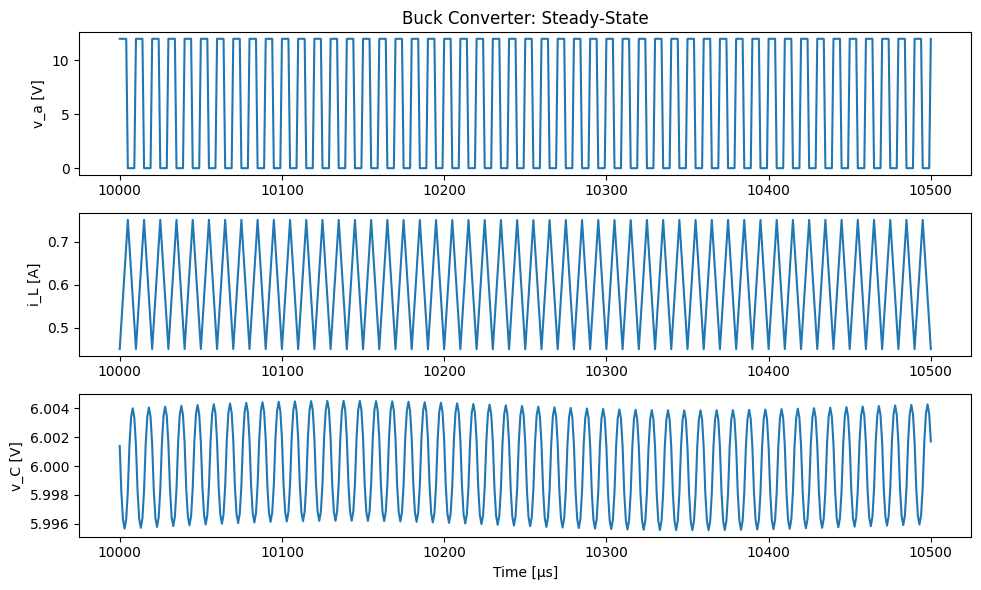

In [2]:
# -----------------------------------------
# なんとなく定常っぽいところを切り出し&保存
# -----------------------------------------
start_t = 100e-4  # 10ms
end_t = 105e-4
mask = (time >= start_t) & (time <= end_t)

time_cut = time[mask]
va_cut = va[mask]
iL_cut = iL[mask]
vC_cut = vC[mask]

# -----------------------------------------
# CSV保存
# -----------------------------------------
df = pd.DataFrame(
    {"time_s": time_cut, "v_a_V": va_cut, "i_L_A": iL_cut, "v_C_V": vC_cut}
)
df.to_csv("../data/buck_converter_steady.csv", index=False)


# すでに抽出済みの time_cut, iL_cut, vC_cut, va_cut を使用
plt.figure(figsize=(10, 6))

# スイッチング波形 v_a
plt.subplot(3, 1, 1)
plt.plot(time_cut * 1e6, va_cut)
plt.ylabel("v_a [V]")
plt.title("Buck Converter: Steady-State")

# インダクタ電流 i_L
plt.subplot(3, 1, 2)
plt.plot(time_cut * 1e6, iL_cut)
plt.ylabel("i_L [A]")

# 出力電圧 v_C
plt.subplot(3, 1, 3)
plt.plot(time_cut * 1e6, vC_cut)
plt.ylabel("v_C [V]")
plt.xlabel("Time [µs]")

plt.tight_layout()
plt.show()
